In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data preprocessing & EDA

In [2]:
import pandas as pd
# from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
# import plotly.graph_objects as go
import seaborn as sns
import numpy as np
import sklearn 
#Import useful libraries.

In [3]:
loan_data_backup = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ODL/default of credit card clients.csv')

In [4]:
loan_data = loan_data_backup.copy()

In [5]:
loan_data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,dpnm
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [6]:
loan_data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,dpnm
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [7]:
loan_data.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,dpnm
29995,29996,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,0,0,47929,48905,49764,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [8]:
loan_data.columns.values

array(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
       'PAY_AMT6', 'dpnm'], dtype=object)

In [9]:
loan_data.info()
#Shows information about the dataframe in general.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_1      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

In [10]:
loan_data.dtypes
#Display datatypes. Dataset is fully numerical

ID           int64
LIMIT_BAL    int64
SEX          int64
EDUCATION    int64
MARRIAGE     int64
AGE          int64
PAY_1        int64
PAY_2        int64
PAY_3        int64
PAY_4        int64
PAY_5        int64
PAY_6        int64
BILL_AMT1    int64
BILL_AMT2    int64
BILL_AMT3    int64
BILL_AMT4    int64
BILL_AMT5    int64
BILL_AMT6    int64
PAY_AMT1     int64
PAY_AMT2     int64
PAY_AMT3     int64
PAY_AMT4     int64
PAY_AMT5     int64
PAY_AMT6     int64
dpnm         int64
dtype: object

In [11]:
loan_data.describe()
#Give statistical information about the dataset

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,dpnm
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [12]:
loan_data.shape
#Shows the number of (rows,columns) in dataset.

(30000, 25)

In [13]:
loan_data['ID'].nunique() 

30000

In [14]:
print (f"There are {loan_data.isna().any().sum()} cells with null values in the data set.")

There are 0 cells with null values in the data set.


In [15]:
loan_data.isnull().sum()
#None of the columns have null values

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
dpnm         0
dtype: int64

In [16]:
loan_data = loan_data.drop(['ID'], axis = 1)

In [17]:
loan_data.duplicated().sum()

35

In [18]:
loan_data = loan_data.drop_duplicates()

In [19]:
loan_data.duplicated().sum()

0

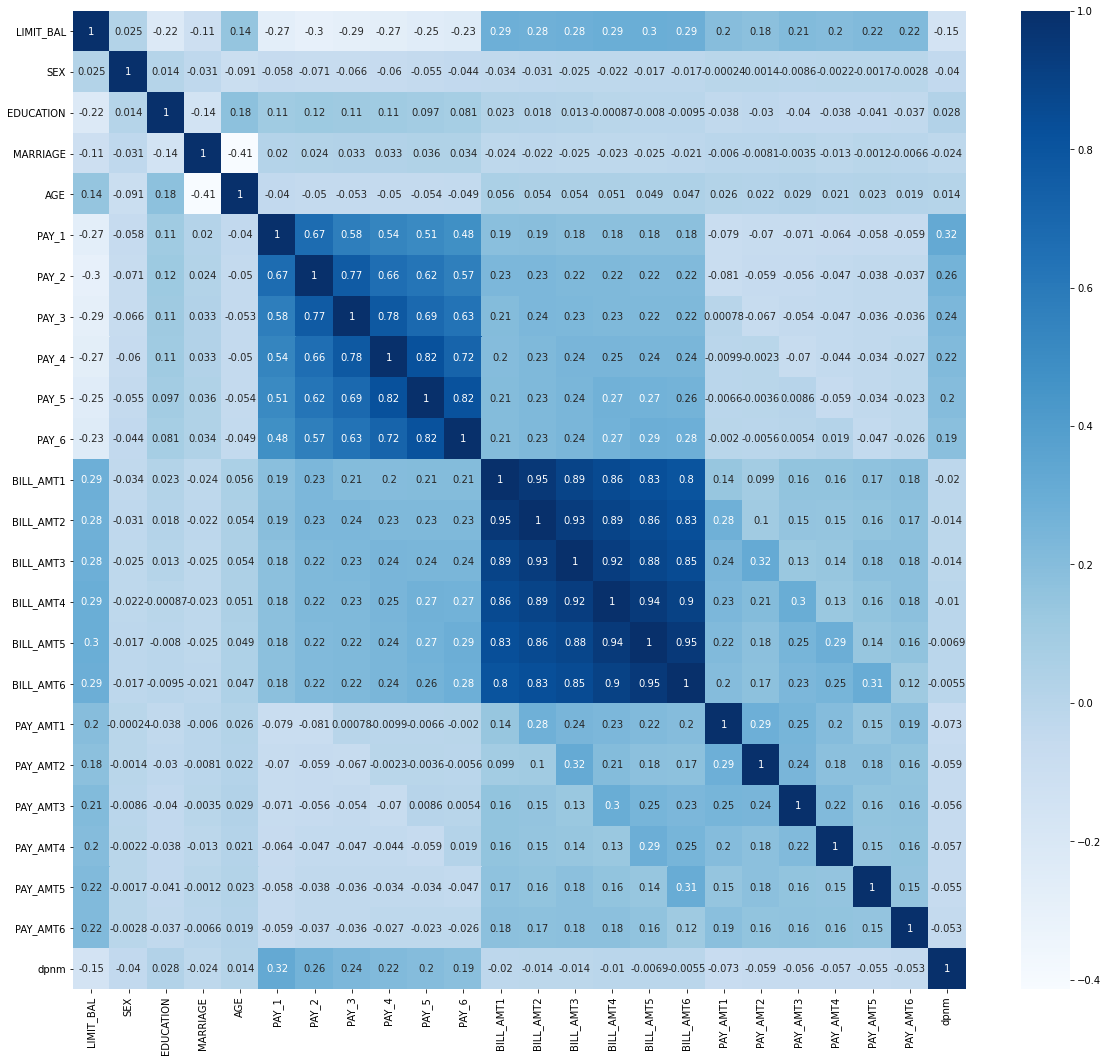

In [20]:
plt.figure(figsize=(20,18))
cor = loan_data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()
#The correlation coefficient has values between -1 to 1
#A value closer to 0 implies weaker correlation (exact 0 implying no correlation)
# A value closer to 1 implies stronger positive correlation
# A value closer to -1 implies stronger negative correlation

In [21]:
#correlation
corr = loan_data.corr()
corr_target=abs(corr["dpnm"])
corr_target
#abs is absolute correlation.

LIMIT_BAL    0.153871
SEX          0.039742
EDUCATION    0.028017
MARRIAGE     0.024019
AGE          0.013619
PAY_1        0.324964
PAY_2        0.263656
PAY_3        0.235230
PAY_4        0.216551
PAY_5        0.204059
PAY_6        0.186740
BILL_AMT1    0.019758
BILL_AMT2    0.014302
BILL_AMT3    0.014182
BILL_AMT4    0.010259
BILL_AMT5    0.006859
BILL_AMT6    0.005469
PAY_AMT1     0.073015
PAY_AMT2     0.058643
PAY_AMT3     0.056319
PAY_AMT4     0.056898
PAY_AMT5     0.055194
PAY_AMT6     0.053250
dpnm         1.000000
Name: dpnm, dtype: float64

In [22]:
loan_data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,dpnm
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [23]:
loan_data.dpnm.value_counts()

0    23335
1     6630
Name: dpnm, dtype: int64

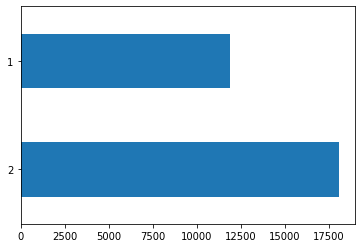

In [24]:
loan_data['SEX'].value_counts()[:20].plot(kind='barh')
#bar chart for value counts.

In [25]:
# counting unique items
item_counts = loan_data["SEX"].value_counts()
item_counts

2    18091
1    11874
Name: SEX, dtype: int64

In [26]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29965 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  29965 non-null  int64
 1   SEX        29965 non-null  int64
 2   EDUCATION  29965 non-null  int64
 3   MARRIAGE   29965 non-null  int64
 4   AGE        29965 non-null  int64
 5   PAY_1      29965 non-null  int64
 6   PAY_2      29965 non-null  int64
 7   PAY_3      29965 non-null  int64
 8   PAY_4      29965 non-null  int64
 9   PAY_5      29965 non-null  int64
 10  PAY_6      29965 non-null  int64
 11  BILL_AMT1  29965 non-null  int64
 12  BILL_AMT2  29965 non-null  int64
 13  BILL_AMT3  29965 non-null  int64
 14  BILL_AMT4  29965 non-null  int64
 15  BILL_AMT5  29965 non-null  int64
 16  BILL_AMT6  29965 non-null  int64
 17  PAY_AMT1   29965 non-null  int64
 18  PAY_AMT2   29965 non-null  int64
 19  PAY_AMT3   29965 non-null  int64
 20  PAY_AMT4   29965 non-null  int64
 21  PAY_AMT5   2

In [27]:
loan_data.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'dpnm'],
      dtype='object')

# Data splitting

In [28]:
#Split into x and y values
y = loan_data.iloc[:, 23].values
X = loan_data.iloc[:, 0:22].values

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.30, random_state=42)

In [30]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

In [31]:
X_train

array([[-0.66844018, -1.23354766,  0.18502098, ..., -0.12880531,
        -0.16298794, -0.15622043],
       [-0.90056615,  0.81066994, -1.08073736, ..., -0.15910714,
        -0.31208142, -0.31200881],
       [-1.13269213, -1.23354766,  0.18502098, ..., -0.2200571 ,
        -0.27279853, -0.2795529 ],
       ...,
       [-0.90056615, -1.23354766, -1.08073736, ..., -0.30195862,
        -0.31208142, -0.31200881],
       [ 0.87906633,  0.81066994,  0.18502098, ...,  0.03828763,
         0.19010433,  0.11050227],
       [ 0.10531307,  0.81066994,  0.18502098, ...,  0.21409595,
        -0.31208142, -0.31200881]])

In [32]:
y_train

array([1, 1, 0, ..., 0, 0, 1])

In [33]:
print("xtrain Shape", X_train.shape)
print("xtest Shape", X_test.shape)
print("ytrain Shape", y_train.shape)
print("ytest Shape", y_test.shape)

xtrain Shape (20975, 22)
xtest Shape (8990, 22)
ytrain Shape (20975,)
ytest Shape (8990,)


# Deep Neural Network

In [34]:
#First model
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation

In [35]:
model = Sequential()

In [36]:
#Add dropout for input layer 
model.add(Dropout(0.2,input_dim=22))
#Add fully connected layer with Relu
model.add(Dense(units = 12, kernel_initializer='uniform', activation= 'relu'))
#input dimension is mandatory only for first hidden layer. It's number of columns in x. 
#Add dropout layer for hidden layer 
model.add(Dropout(0.2))
#Add first hidden layer
model.add(Dense(units = 12, kernel_initializer='uniform', activation= 'relu'))
#Add dropout layer
model.add(Dropout(0.2))
#Add second hidden layer
model.add(Dense(units = 12, kernel_initializer='uniform', activation= 'relu'))

#Adding output layer
model.add(Dense(units = 1, kernel_initializer='uniform', activation= 'sigmoid'))
#1 unit as it's 1 y column value.

In [37]:
#Compile sequential model
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [ ]:
model.fit(X_train, y_train, batch_size = 12, epochs=30, validation_data=(X_test, y_test))

Epoch 1/30
1748/1748 [==============================] - 7s 3ms/step - loss: 0.5805 - accuracy: 0.7836 - val_loss: 0.5319 - val_accuracy: 0.7762
Epoch 2/30
1748/1748 [==============================] - 4s 2ms/step - loss: 0.5220 - accuracy: 0.7841 - val_loss: 0.5317 - val_accuracy: 0.7762
Epoch 3/30
1748/1748 [==============================] - 4s 2ms/step - loss: 0.5263 - accuracy: 0.7805 - val_loss: 0.5317 - val_accuracy: 0.7762
Epoch 4/30
1748/1748 [==============================] - 4s 2ms/step - loss: 0.5278 - accuracy: 0.7793 - val_loss: 0.5317 - val_accuracy: 0.7762
Epoch 5/30
1748/1748 [==============================] - 4s 2ms/step - loss: 0.5261 - accuracy: 0.7807 - val_loss: 0.5317 - val_accuracy: 0.7762
Epoch 6/30
1748/1748 [==============================] - 4s 2ms/step - loss: 0.5243 - accuracy: 0.7821 - val_loss: 0.5317 - val_accuracy: 0.7762
Epoch 7/30
1748/1748 [==============================] - 4s 2ms/step - loss: 0.5299 - accuracy: 0.7777 - val_loss: 0.5318 - val_accuracy:

# Using grid search for cross validation

In [ ]:
#Using grid search to determine parameters
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neural_network import MLPClassifier

#Parameters to check
parameters = {'alpha':[0.0001, 0.05],
              'solver': ['adam', 'sgd', 'adamax'],
              'learning_rate': ['constant','adaptive'],
              'activation': ['tanh', 'relu'],  
              'hidden_layer_sizes': [(10), (5,5),(4,5,6),(20)],
             }
#Use decision tree to estimate.
dt = MLPClassifier(random_state=42)

#Use gridsearchCV for cross validation
grid_search = GridSearchCV(dt, parameters, cv=5,n_jobs=-1, verbose=1)

#Train Gridsearch on training data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 28.7min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed: 30.7min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_state...
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['ta

In [ ]:
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation

In [ ]:
#Initialising ANN
classifier = Sequential()
#Classifier is initiated variable

In [ ]:
classifier.add(Dense(units = 12, kernel_initializer='uniform', activation= 'relu',input_dim=22))
#input dimension is mandatory only for first hidden layer. It's number of columns in x. 

#Add second hidden layer
classifier.add(Dense(units = 12, kernel_initializer='uniform', activation= 'relu'))

#Add third hidden layer
classifier.add(Dense(units = 12, kernel_initializer='uniform', activation= 'relu'))


In [ ]:
#Adding output layer
classifier.add(Dense(units = 1, kernel_initializer='uniform', activation= 'sigmoid'))
#1 unit as it's 1 y column value.

In [ ]:
#Compile sequential model
classifier.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')


In [ ]:
#Fit ANN to train set
history = classifier.fit(X_train, y_train, batch_size = 10, epochs=94, validation_data=(X_test, y_test))
#epoch and batch size can be changed

Epoch 1/94
2098/2098 [==============================] - 5s 2ms/step - loss: 0.5220 - accuracy: 0.7809 - val_loss: 0.4795 - val_accuracy: 0.7875
Epoch 2/94
2098/2098 [==============================] - 4s 2ms/step - loss: 0.4713 - accuracy: 0.7969 - val_loss: 0.4760 - val_accuracy: 0.8006
Epoch 3/94
2098/2098 [==============================] - 4s 2ms/step - loss: 0.4669 - accuracy: 0.8090 - val_loss: 0.4757 - val_accuracy: 0.8063
Epoch 4/94
2098/2098 [==============================] - 4s 2ms/step - loss: 0.4707 - accuracy: 0.8059 - val_loss: 0.4745 - val_accuracy: 0.8080
Epoch 5/94
2098/2098 [==============================] - 4s 2ms/step - loss: 0.4623 - accuracy: 0.8125 - val_loss: 0.4753 - val_accuracy: 0.8125
Epoch 6/94
2098/2098 [==============================] - 4s 2ms/step - loss: 0.4661 - accuracy: 0.8100 - val_loss: 0.4736 - val_accuracy: 0.8123
Epoch 7/94
2098/2098 [==============================] - 4s 2ms/step - loss: 0.4698 - accuracy: 0.8121 - val_loss: 0.4726 - val_accuracy:

In [ ]:
#predicting test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
#0.5 is threshold value. range is 0-1.
#Increase to increase accuracy

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8194660734149054

In [ ]:
#Making confusion matrix. Helps checking how good prediction is when checking binary values
#REGRESSION: RMSE, MSE, MAE, R2
#Classification: confusion matrix, accuracy, precision, recall
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm
#TP FP
#FN TN

array([[6664,  314],
       [1309,  703]])

In [ ]:
# Display the evaluation metrics
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.96      0.89      6978
           1       0.69      0.35      0.46      2012

    accuracy                           0.82      8990
   macro avg       0.76      0.65      0.68      8990
weighted avg       0.80      0.82      0.80      8990



In [ ]:
#Summarize first 10 cases
for i in range(10):
  print('%s => %d (expected %d)' %(X[i].tolist(), y_pred[i], y[i]))

[20000, 2, 2, 1, 24, 2, 2, -1, -1, -2, -2, 3913, 3102, 689, 0, 0, 0, 0, 689, 0, 0, 0] => 0 (expected 1)
[120000, 2, 2, 2, 26, -1, 2, 0, 0, 0, 2, 2682, 1725, 2682, 3272, 3455, 3261, 0, 1000, 1000, 1000, 0] => 0 (expected 1)
[90000, 2, 2, 2, 34, 0, 0, 0, 0, 0, 0, 29239, 14027, 13559, 14331, 14948, 15549, 1518, 1500, 1000, 1000, 1000] => 0 (expected 0)
[50000, 2, 2, 1, 37, 0, 0, 0, 0, 0, 0, 46990, 48233, 49291, 28314, 28959, 29547, 2000, 2019, 1200, 1100, 1069] => 0 (expected 0)
[50000, 1, 2, 1, 57, -1, 0, -1, 0, 0, 0, 8617, 5670, 35835, 20940, 19146, 19131, 2000, 36681, 10000, 9000, 689] => 0 (expected 0)
[50000, 1, 1, 2, 37, 0, 0, 0, 0, 0, 0, 64400, 57069, 57608, 19394, 19619, 20024, 2500, 1815, 657, 1000, 1000] => 0 (expected 0)
[500000, 1, 1, 2, 29, 0, 0, 0, 0, 0, 0, 367965, 412023, 445007, 542653, 483003, 473944, 55000, 40000, 38000, 20239, 13750] => 0 (expected 0)
[100000, 2, 2, 2, 23, 0, -1, -1, 0, 0, -1, 11876, 380, 601, 221, -159, 567, 380, 601, 0, 581, 1687] => 0 (expected 0)
[1

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


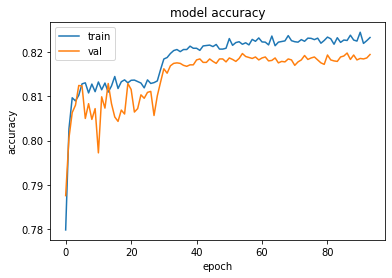

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc="upper left")
plt.show()

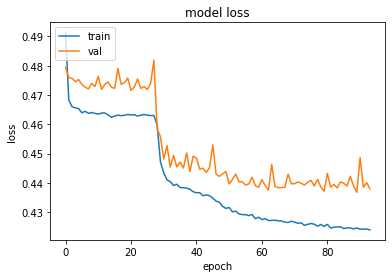

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()